In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
from statsmodels.formula.api import ols

## 1. Making predictions

### 1.1. Predicting house prices

In [2]:
taiwan_real_estate = pd.read_csv('../data/taiwan_real_estate2.csv')

In [3]:
taiwan_real_estate.shape

(414, 4)

In [4]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [5]:
taiwan_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dist_to_mrt_m    414 non-null    float64
 1   n_convenience    414 non-null    int64  
 2   house_age_years  414 non-null    object 
 3   price_twd_msq    414 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB


In [6]:
taiwan_real_estate.describe().T

,count,mean,std,min,25%,50%,75%,max
dist_to_mrt_m,414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
n_convenience,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
price_twd_msq,414.0,11.491738,4.116940,2.299546,8.381241,11.633888,14.099849,35.552194


In [7]:
# Inintializing linear model:
model = ols(formula='price_twd_msq ~ n_convenience', data=taiwan_real_estate)

In [8]:
# Fitting the model:
model = model.fit()

In [9]:
# Getting paramerters:
model.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [10]:
# Getting summary:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           3.41e-37
Time:                        12:03:39   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Making predictions:
prediction_data = pd.DataFrame({'n_convenience': np.arange(11)})
prediction_data['price_twd_msq'] = model.predict(prediction_data['n_convenience'])
prediction_data.head()

,n_convenience,price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556


### 1.2. Visualizing predictions

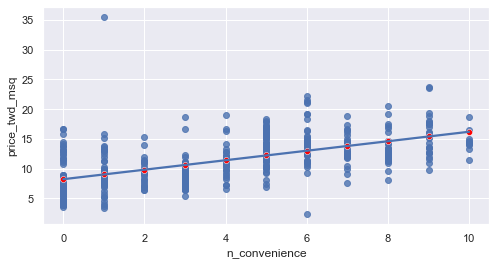

In [12]:
# Plotting predictions:
fig, ax = plt.subplots(figsize=(8, 4))
sns.regplot(data=taiwan_real_estate, x='n_convenience', y='price_twd_msq', ci=False, ax=ax)
sns.scatterplot(data=prediction_data, x='n_convenience', y='price_twd_msq', color='red', ax=ax);

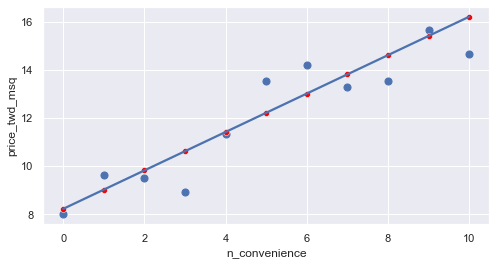

In [13]:
# Plotting predictions (reducing clutter):
fig, ax = plt.subplots(figsize=(8, 4))
sns.regplot(data=taiwan_real_estate, x='n_convenience', y='price_twd_msq', x_estimator=np.mean, ci=False, ax=ax)
sns.scatterplot(data=prediction_data, x='n_convenience', y='price_twd_msq', color='red', ax=ax);

### 1.3. The limits of prediction

In [14]:
# Creating an array of some impossible values:
impossible = pd.DataFrame({'n_convenience': [-1, 2.5]})

In [15]:
# Making preditions:
impossible['price_twd_msq'] = model.predict(impossible['n_convenience'])
impossible

,n_convenience,price_twd_msq
0,-1.0,7.426158
1,2.5,10.219437


## 2. Working with model objects

### 2.1. Extracting model elements

In [16]:
model.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

In [17]:
model.fittedvalues.head()

0    16.205035
1    15.406955
2    12.214636
3    12.214636
4    12.214636
dtype: float64

In [18]:
model.resid.head()

0   -4.737561
1   -2.638422
2    2.097013
3    4.366302
4    0.826211
dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           3.41e-37
Time:                        12:03:41   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.2. Manually predicting house prices

In [20]:
# Getting the slope and intercept:
intercept, slope = model.params

In [21]:
# Making predictions manually:
manual_prediction = intercept + taiwan_real_estate['n_convenience'] * slope
manual_prediction.head()

0    16.205035
1    15.406955
2    12.214636
3    12.214636
4    12.214636
Name: n_convenience, dtype: float64

In [22]:
# Comparing the results:
model.predict(taiwan_real_estate['n_convenience']).head()

0    16.205035
1    15.406955
2    12.214636
3    12.214636
4    12.214636
dtype: float64

## 3. Regression to the mean

### 3.1. Home run!

Regression to the mean is an important concept in many areas, including sports.

Here you can see a dataset of baseball batting data in 2017 and 2018. Each point represents a player, and more home runs are better. A naive prediction might be that the performance in 2018 is the same as the performance in 2017. That is, a linear regression would lie on the "y equals x" line.

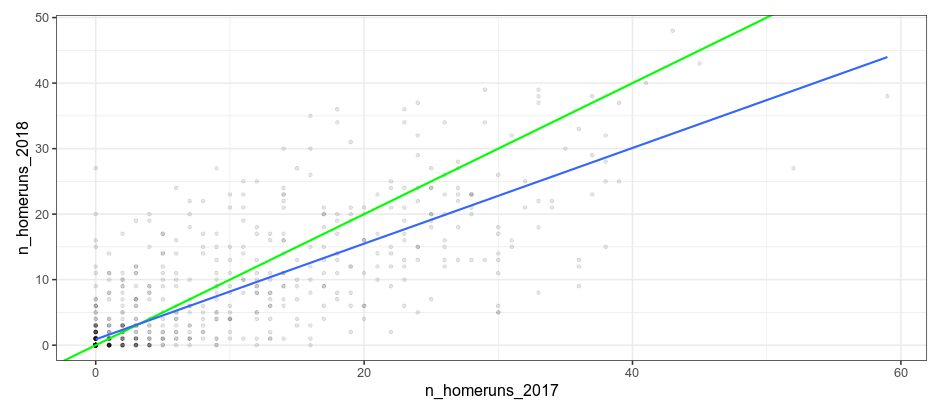

> - 
Someone who hit 40 home runs in 2017 is predicted to hit 10 fewer home runs the next year because regression to the mean states that, on average, extremely high values are not sustained.

### 3.2. Plotting consecutive portfolio returns

In [23]:
sp500_yearly_returns = pd.read_csv('../data/sp500_yearly_returns.csv')

In [24]:
sp500_yearly_returns.shape

(493, 3)

In [25]:
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


In [26]:
sp500_yearly_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       493 non-null    object 
 1   return_2018  493 non-null    float64
 2   return_2019  493 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [27]:
sp500_yearly_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
return_2018,493.0,-0.048695,0.228155,-0.576078,-0.206344,-0.057428,0.068880,1.326161
return_2019,493.0,0.320343,0.248041,-0.475172,0.166464,0.305857,0.444273,1.484291


The sp500_yearly_returns dataset contains three columns:

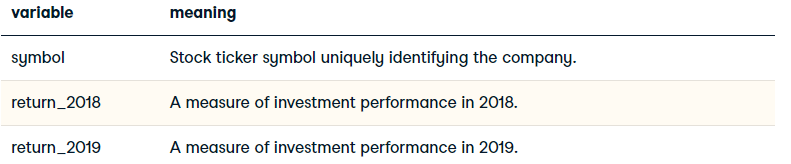

> - A positive number for the return means the investment increased in value; negative means it lost value.
> - Just as with baseball home runs, a naive prediction might be that the investment performance stays the same from year to year, lying on the y equals x line.

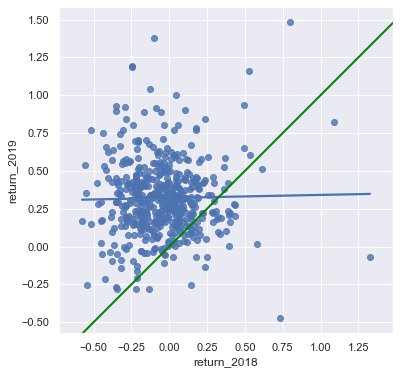

In [28]:
# Plotting 2018 Vs. 2019 return:
fig, ax = plt.subplots(figsize=(6, 6))
sns.regplot(data=sp500_yearly_returns, x='return_2018', y='return_2019', ci=False, ax=ax)
ax.axline(xy1=(0, 0), slope=1, linewidth=2, color='green')
ax.axis('equal');

### 3.3. Modeling consecutive returns

In [29]:
# Initializing and fitting the model:
model = ols(formula='return_2019 ~ return_2018', data=sp500_yearly_returns).fit()

In [30]:
# Getting paramerters:
model.params

Intercept      0.321321
return_2018    0.020069
dtype: float64

In [31]:
# Making predictions:
explanatory_data = pd.DataFrame({'return_2018': [-1, 0, 1]})
model.predict(explanatory_data)

0    0.301251
1    0.321321
2    0.341390
dtype: float64

## 4. Transforming variables

### 4.1. Transforming the explanatory variable

In [36]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [37]:
taiwan_real_estate['sqrt_dist_to_mrt_m'] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

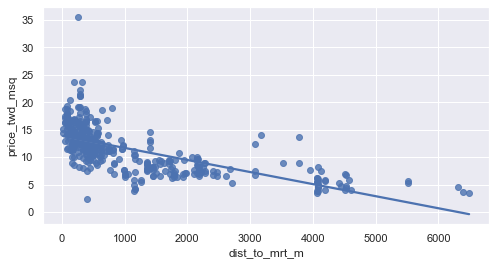

In [44]:
fig = plt.figure(figsize=(8, 4))
ax = sns.regplot(data=taiwan_real_estate, x='dist_to_mrt_m', y='price_twd_msq', ci=False);

In [39]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m
0,84.87882,10,30 to 45,11.467474,9.212970
1,306.59470,9,15 to 30,12.768533,17.509846
2,561.98450,5,0 to 15,14.311649,23.706212
3,561.98450,5,0 to 15,16.580938,23.706212
4,390.56840,5,0 to 15,13.040847,19.762803


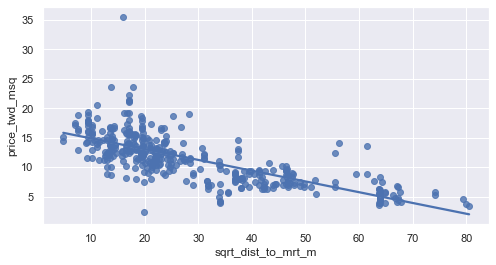

In [45]:
fig = plt.figure(figsize=(8, 4))
ax = sns.regplot(data=taiwan_real_estate, x='sqrt_dist_to_mrt_m', y='price_twd_msq', ci=False);

In [46]:
model = ols(formula='price_twd_msq ~ sqrt_dist_to_mrt_m', data=taiwan_real_estate).fit()

In [48]:
model.params

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

In [51]:
prediction_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})
prediction_data.head()

,sqrt_dist_to_mrt_m,dist_to_mrt_m
0,0.0,0
1,10.0,100
2,20.0,400
3,30.0,900
4,40.0,1600


In [52]:
prediction_data['price_twd_msq'] = model.predict(prediction_data['sqrt_dist_to_mrt_m'])
prediction_data

,sqrt_dist_to_mrt_m,dist_to_mrt_m,price_twd_msq
0,0.0,0,16.709799
1,10.0,100,14.881370
2,20.0,400,13.052942
3,30.0,900,11.224513
4,40.0,1600,9.396085
5,50.0,2500,7.567656
6,60.0,3600,5.739227
7,70.0,4900,3.910799
8,80.0,6400,2.082370


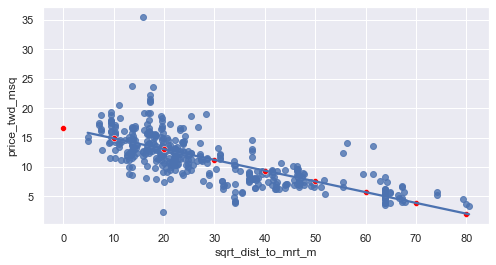

In [54]:
fig = plt.figure(figsize=(8, 4))
ax = sns.regplot(data=taiwan_real_estate, x='sqrt_dist_to_mrt_m', y='price_twd_msq', ci=False)
ax = sns.scatterplot(data=prediction_data, x='sqrt_dist_to_mrt_m', y='price_twd_msq', ci=False, color='red');

### 4.2. Transforming the response variable too